<div style="margin-left:15%;margin-right:15%;text-align:center">
<h1 style="font-size:290%;font-family:Bahnschrift">Correlation between 2020 presidential election outcomes and popular venue types across U.S. counties</h1>
<h2 style="margin-top:5px;font-size:170%;font-family:Bahnschrift">IBM Applied Data Science Capstone Project (Week 4) - Notebook</h2>
    </div>

<h4 style="margin-top:5px;font-size:170%;font-family:Bahnschrift">I. Rural-urban divide in presidential elections </h4>

In [1]:
# The code was removed by Watson Studio for sharing.

In [2]:
election_by_county.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [3]:
rural_urban_divide = {'Biden':{'rural':[], 'less_populated':[], 'more_populated':[], 'highly_populated':[]}, 'Trump':{'rural':[], 'less_populated':[], 'more_populated':[], 'highly_populated':[]}}
election_by_county.dropna(inplace=True, axis=0)

for state in election_by_county['state'].unique():
    temp_state = election_by_county[election_by_county['state']==state]
    for county in temp_state['county'].unique():
        temp_county = temp_state[temp_state['county']==county]
        total_votes = temp_county['total_votes'].sum()
        biden_votes = float(round(int(temp_county[temp_county['candidate']=='Joe Biden']['total_votes'])/total_votes*100, 3))
        trump_votes = float(round(int(temp_county[temp_county['candidate']=='Donald Trump']['total_votes'])/total_votes*100, 3))
        if total_votes < 2000:
            rural_urban_divide['Biden']['rural'].append(biden_votes)
            rural_urban_divide['Trump']['rural'].append(trump_votes)
        elif total_votes < 50000:
            rural_urban_divide['Biden']['less_populated'].append(biden_votes)
            rural_urban_divide['Trump']['less_populated'].append(trump_votes)
        elif total_votes < 2000000:
            rural_urban_divide['Biden']['more_populated'].append(biden_votes)
            rural_urban_divide['Trump']['more_populated'].append(trump_votes)
        else:
            rural_urban_divide['Biden']['highly_populated'].append(biden_votes)
            rural_urban_divide['Trump']['highly_populated'].append(trump_votes)
            
print('Done.')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in long_scalars
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in long_scalars


Done.


In [4]:
import math
import statistics

rural_urban_divide['Biden']['rural'] =  [x for x in rural_urban_divide['Biden']['rural'] if math.isnan(x) == False]
rural_urban_divide['Trump']['rural'] =  [x for x in rural_urban_divide['Trump']['rural'] if math.isnan(x) == False]
rural_urban_divide['Biden']['less_populated'] = [x for x in rural_urban_divide['Biden']['less_populated'] if math.isnan(x) == False]
rural_urban_divide['Trump']['less_populated'] = [x for x in rural_urban_divide['Trump']['less_populated'] if math.isnan(x) == False]
rural_urban_divide['Biden']['more_populated'] = [x for x in rural_urban_divide['Biden']['more_populated'] if math.isnan(x) == False]
rural_urban_divide['Trump']['more_populated'] = [x for x in rural_urban_divide['Trump']['more_populated'] if math.isnan(x) == False]
rural_urban_divide['Biden']['highly_populated'] = [x for x in rural_urban_divide['Biden']['highly_populated'] if math.isnan(x) == False]
rural_urban_divide['Trump']['highly_populated'] = [x for x in rural_urban_divide['Trump']['highly_populated'] if math.isnan(x) == False]


print('Joe Biden won an average of:')
print(str(round(statistics.mean(rural_urban_divide['Biden']['rural']), 2)) + ' percent of the vote in rural areas (below 2 000 citizens).')
print(str(round(statistics.mean(rural_urban_divide['Biden']['less_populated']), 2)) + ' percent of the vote in counties with between 2000 and 50 000 citizens.')
print(str(round(statistics.mean(rural_urban_divide['Biden']['more_populated']), 2)) + ' percent of the vote in counties with between 50 000 and 2 000 000 citizens.')
print(str(round(statistics.mean(rural_urban_divide['Biden']['highly_populated']), 2)) + ' percent of the vote in counties with more than 2 million citizens.')
print('\n')
print('Donald Trump won an average of:')
print(str(round(statistics.mean(rural_urban_divide['Trump']['rural']), 2)) + ' percent of the vote in rural areas (below 2 000 citizens).')
print(str(round(statistics.mean(rural_urban_divide['Trump']['less_populated']), 2)) + ' percent of the vote in counties with between 2000 and 50 000 citizens.')
print(str(round(statistics.mean(rural_urban_divide['Trump']['more_populated']), 2)) + ' percent of the vote in counties with between 50 000 and 2 000 000 citizens.')
print(str(round(statistics.mean(rural_urban_divide['Trump']['highly_populated']), 2)) + ' percent of the vote in counties with more than 2 million citizens.')

Joe Biden won an average of:
42.23 percent of the vote in rural areas (below 2 000 citizens).
36.92 percent of the vote in counties with between 2000 and 50 000 citizens.
48.66 percent of the vote in counties with between 50 000 and 2 000 000 citizens.
65.23 percent of the vote in counties with more than 2 million citizens.


Donald Trump won an average of:
55.31 percent of the vote in rural areas (below 2 000 citizens).
61.16 percent of the vote in counties with between 2000 and 50 000 citizens.
49.42 percent of the vote in counties with between 50 000 and 2 000 000 citizens.
33.01 percent of the vote in counties with more than 2 million citizens.


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Percentage of votes')

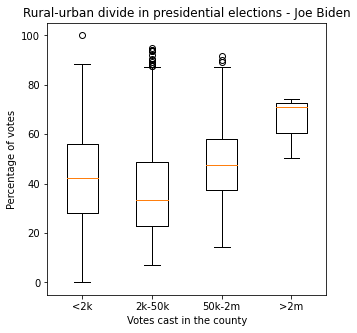

In [5]:
import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots(figsize=(5,5))
boxplot_data = [rural_urban_divide['Biden']['rural'], rural_urban_divide['Biden']['less_populated'], rural_urban_divide['Biden']['more_populated'], rural_urban_divide['Biden']['highly_populated']]
ax1.boxplot(boxplot_data)
ax1.set_title('Rural-urban divide in presidential elections - Joe Biden')
plt.xticks([1, 2, 3, 4], ['<2k', '2k-50k', '50k-2m', '>2m'])
ax1.set_xlabel('Votes cast in the county')
ax1.set_ylabel('Percentage of votes')

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Percentage of votes')

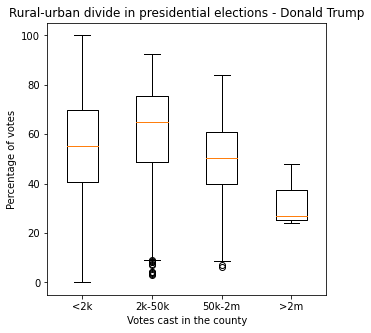

In [6]:
fig2, ax2 = plt.subplots(figsize=(5,5))
boxplot_data = [rural_urban_divide['Trump']['rural'], rural_urban_divide['Trump']['less_populated'], rural_urban_divide['Trump']['more_populated'], rural_urban_divide['Trump']['highly_populated']]
ax2.boxplot(boxplot_data)
ax2.set_title('Rural-urban divide in presidential elections - Donald Trump')
plt.xticks([1, 2, 3, 4], ['<2k', '2k-50k', '50k-2m', '>2m'])
ax2.set_xlabel('Votes cast in the county')
ax2.set_ylabel('Percentage of votes')

<h4 style="margin-top:5px;font-size:170%;font-family:Bahnschrift">II. Role of third-party candidates in 2020 presidential election</h4>

In [7]:
print('Third-party candidates won the election in a total of ' + str(election_by_county[(election_by_county['candidate'] != 'Joe Biden')&
                                                                             (election_by_county['candidate'] != 'Donald Trump')&
                                                                             (election_by_county['won']==True)]['won'].count()) + ' counties.\n')
print(election_by_county[(election_by_county['candidate'] != 'Joe Biden')&(election_by_county['candidate'] != 'Donald Trump')&(election_by_county['won']==True)])

Third-party candidates won the election in a total of 4 counties.

        state  county     candidate party  total_votes   won
5836    Maine  Hersey  Jo Jorgensen   LIB           33  True
28362  Alaska   ED 26     Write-ins   WRI        10181  True
28370  Alaska   ED 27     Write-ins   WRI         9531  True
28378  Alaska   ED 28     Write-ins   WRI        12831  True


In [8]:
print('Third-party candidates received a total of ' + str(election_by_county[(election_by_county['candidate'] != 'Joe Biden')&(election_by_county['candidate'] != 'Donald Trump')]['total_votes'].sum()) 
+ ' votes, accounting for ' +
str(round(election_by_county[(election_by_county['candidate'] != 'Joe Biden')&(election_by_county['candidate'] != 'Donald Trump')]['total_votes'].sum()
    /election_by_county['total_votes'].sum()*100, 3))
+ '% of all votes.')


Third-party candidates received a total of 2976098 votes, accounting for 1.865% of all votes.


In [9]:
third_party_cands = {}
for candidate in election_by_county[(election_by_county['candidate'] != 'Joe Biden') & (election_by_county['candidate'] != 'Donald Trump')]['candidate'].unique():
    third_party_cands[candidate] = {'rural':[], 'less_populated':[], 'more_populated':[], 'highly_populated':[]}


for state in election_by_county['state'].unique():
    temp_state = election_by_county[election_by_county['state']==state]
    for county in temp_state['county'].unique():
        temp_county = temp_state[temp_state['county']==county]
        total_votes = temp_county['total_votes'].sum()
        for candidate in temp_state[(temp_state['candidate'] != 'Joe Biden')&(temp_state['candidate'] != 'Donald Trump')]['candidate'].unique():
            
            times_skipped = 0
            if temp_county[temp_county['candidate']==candidate]['total_votes'].empty:
                continue
            candidate_votes = float(round(float(temp_county[temp_county['candidate']==candidate]['total_votes'])/total_votes*100, 3))
            if total_votes < 2000:
                third_party_cands[candidate]['rural'].append(candidate_votes)
            elif total_votes < 50000:
                third_party_cands[candidate]['less_populated'].append(candidate_votes)
            elif total_votes < 2000000:
                third_party_cands[candidate]['more_populated'].append(candidate_votes)
            else:
                third_party_cands[candidate]['highly_populated'].append(candidate_votes)
            


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:16: RuntimeWarning: invalid value encountered in true_divide


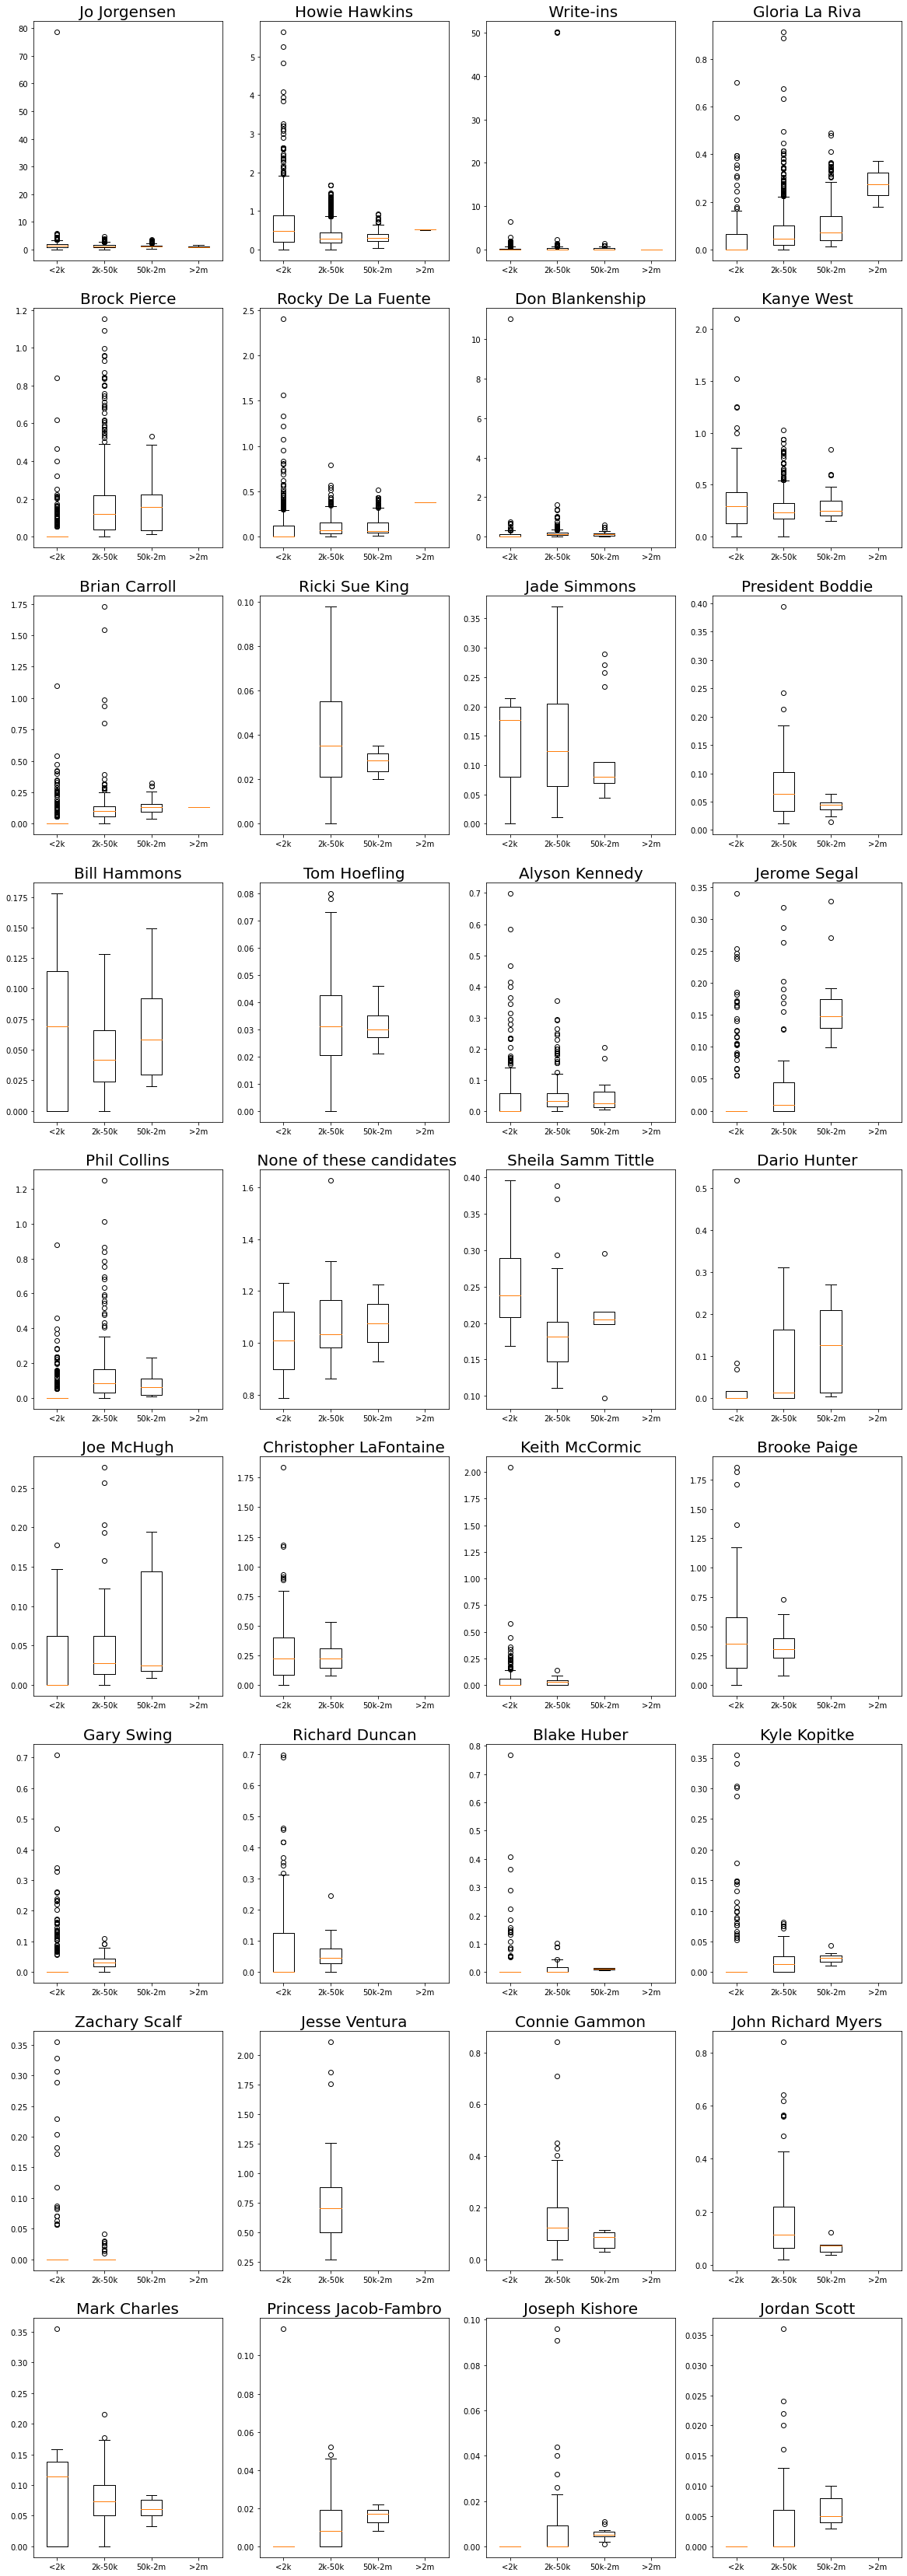

In [10]:
import numpy as np
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)
cand_len = len(election_by_county[(election_by_county['candidate'] != 'Joe Biden') & (election_by_county['candidate'] != 'Donald Trump')]['candidate'].unique())
plt.figure(figsize=(20, 60))
row = int(cand_len/6)+1
 
for i in range(cand_len):
    plt.subplot(9, 4, i+1)
    cand_data = third_party_cands[list(third_party_cands.keys())[i]]
    cand_data['rural'] = [x for x in cand_data['rural'] if math.isnan(x)==False]
    cand_data['less_populated'] = [x for x in cand_data['less_populated'] if math.isnan(x)==False]
    cand_data['more_populated'] = [x for x in cand_data['more_populated'] if math.isnan(x)==False]
    cand_data['highly_populated'] = [x for x in cand_data['highly_populated'] if math.isnan(x)==False]
    
    plt.boxplot([cand_data['rural'], cand_data['less_populated'], cand_data['more_populated'], cand_data['highly_populated']])
    plt.title(str(list(third_party_cands.keys())[i]), fontdict = {'fontsize' : 20})
    plt.xticks([1, 2, 3, 4], ['<2k', '2k-50k', '50k-2m', '>2m'])


<h4 style="margin-top:5px;font-size:170%;font-family:Bahnschrift">III. Location analysis of the most Republican and most Democratic counties</h4>

In [11]:
pres_dif = pd.DataFrame(columns=['county', 'winner', 'percentage_of_votes', 'votes_overall'])
counties = []
perc_of_v = []
winners = []
votes_overall = []


for state in election_by_county['state'].unique():
    temp_state = election_by_county[election_by_county['state']==state]
    for county in temp_state['county'].unique():
        temp_county = temp_state[temp_state['county']==county]
        total_votes = temp_county['total_votes'].sum()
        if total_votes>=20000:
            winner = temp_county[temp_county['won']==True]['candidate'].to_string(index=False)
            percentage_of_votes = (round(int(temp_county[temp_county['won']==True]['total_votes'])/total_votes*100, 3))
            counties.append(county + ', ' + state)
            winners.append(winner)
            perc_of_v.append(percentage_of_votes)
            votes_overall.append(total_votes)
            
print('Done.')

Done.


In [12]:
pres_dif['county'] = counties
pres_dif['winner'] = winners
pres_dif['percentage_of_votes'] = perc_of_v
pres_dif['votes_overall'] = votes_overall

print('\n\nHere are the 15 most democratic counties:')

choosen_counties = pres_dif.copy()
democratic_counties = choosen_counties[choosen_counties['winner']==' Joe Biden'][['county', 'percentage_of_votes', 'votes_overall']].sort_values('percentage_of_votes', ascending=False)[:100].reset_index(drop=True)
unique_states = []

for num in range(democratic_counties.shape[0]):
    county = democratic_counties.loc[num,:]
    if county['county'].split(",")[1] in unique_states:
        democratic_counties.drop(democratic_counties.index[democratic_counties['county'] == county['county']].tolist(),inplace=True)
    unique_states.append(county['county'].split(",")[1])
   
democratic_counties = democratic_counties[:15].reset_index(drop=True)
print(democratic_counties)

print('\n\nHere are the 15 most republican counties:')
    
republican_counties = choosen_counties[choosen_counties['winner']==' Donald Trump'][['county', 'percentage_of_votes', 'votes_overall']].sort_values('percentage_of_votes', ascending=False)[:100].reset_index(drop=True)
unique_states = []

for num in range(republican_counties.shape[0]):
    county = republican_counties.loc[num,:]
    if county['county'].split(",")[1] in unique_states:
        republican_counties.drop(republican_counties.index[republican_counties['county'] == county['county']].tolist(),inplace=True)
    unique_states.append(county['county'].split(",")[1])

republican_counties = republican_counties[:15].reset_index(drop=True)
print(republican_counties)




Here are the 15 most democratic counties:
                               county  percentage_of_votes  votes_overall
0        Ward 7, District of Columbia               94.784          38384
1            Cambridge, Massachusetts               91.674          54795
2    Prince George's County, Maryland               89.256         424855
3           New York County, New York               86.736         695263
4                 Burlington, Vermont               86.587          22218
5               Hartford, Connecticut               86.582          32687
6      Charlottesville city, Virginia               85.503          24205
7    San Francisco County, California               85.274         443458
8             Clayton County, Georgia               84.987         112330
9           Orleans Parish, Louisiana               83.149         177819
10           St. Louis city, Missouri               82.238         133867
11  Philadelphia County, Pennsylvania               81.442         7

In [13]:
dem_include_str = 'The most Democratic counties include '
for county in democratic_counties['county']:
    dem_include_str = dem_include_str + county.split(",")[0] + ' (' + county.split(",")[1][1:] + '), '
print(dem_include_str)
rep_include_str = ' while the most Republican counties include '
for county in republican_counties['county'].tolist()[:-1]:
    rep_include_str = rep_include_str + county.split(",")[0] + ' (' + county.split(",")[1][1:] + '), '
rep_include_str = rep_include_str + 'and ' + republican_counties['county'].tolist()[-1].split(",")[0] + ' (' + republican_counties['county'].tolist()[-1].split(",")[1][1:] + ').'
print(rep_include_str)

The most Democratic counties include Ward 7 (District of Columbia), Cambridge (Massachusetts), Prince George's County (Maryland), New York County (New York), Burlington (Vermont), Hartford (Connecticut), Charlottesville city (Virginia), San Francisco County (California), Clayton County (Georgia), Orleans Parish (Louisiana), St. Louis city (Missouri), Philadelphia County (Pennsylvania), Portland (Maine), Durham County (North Carolina), Providence (Rhode Island), 
 while the most Republican counties include Blount County (Alabama), Hardin County (Texas), Livingston Parish (Louisiana), Bedford County (Pennsylvania), Tazewell County (Virginia), Laurel County (Kentucky), Hawkins County (Tennessee), Mercer County (Ohio), Pearl River County (Mississippi), Habersham County (Georgia), Grady County (Oklahoma), Box Elder County (Utah), Lea County (New Mexico), Alexander County (North Carolina), and White County (Arkansas).


In [14]:
from geopy.geocoders import Nominatim
dems = democratic_counties[['county']]
reps = republican_counties[['county']]
dems_lat = []
dems_lng = []
rep_lat = []
rep_lng = []


for address in list(dems['county']):
    geolocator = Nominatim(user_agent=str("battle_of_"+address[:7]))
    location = geolocator.geocode(address)
    latitude = location.latitude  
    longitude = location.longitude
    dems_lat.append(latitude)
    dems_lng.append(longitude)
    
dems['latitude'] = dems_lat
dems['longitude'] = dems_lng
    
for address in list(reps['county']):
    geolocator = Nominatim(user_agent="battle_of_neighborhoods")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    rep_lat.append(latitude)
    rep_lng.append(longitude)
    
reps['latitude'] = rep_lat
reps['longitude'] = rep_lng 

    
print(dems)
print('\n')
print(reps)

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                               county   latitude   longitude
0        Ward 7, District of Columbia  38.938180  -77.086225
1            Cambridge, Massachusetts  42.375100  -71.105616
2    Prince George's County, Maryland  38.803929  -76.851870
3           New York County, New York  40.781018  -73.959300
4                 Burlington, Vermont  44.476160  -73.212906
5               Hartford, Connecticut  41.765558  -72.690613
6      Charlottesville city, Virginia  38.029306  -78.476678
7    San Francisco County, California  37.779026 -122.419906
8             Clayton County, Georgia  33.520496  -84.359171
9           Orleans Parish, Louisiana  30.080144  -89.931913
10           St. Louis city, Missouri  38.626426  -90.199585
11  Philadelphia County, Pennsylvania  40.011454  -75.132650
12                    Portland, Maine  43.661028  -70.254860
13      Durham County, North Carolina  36.018132  -78.875158
14           Providence, Rhode Island  41.823989  -71.412834


                      

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [52]:
!pip install folium

/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 5.2 MB/s  eta 0:00:01


In [62]:
import folium
all_counties = pd.concat([dems, reps])

map_us = folium.Map(location=[all_counties['latitude'].mean(), all_counties['longitude'].mean()], zoom_start=4)


for lat, lng, label in zip(dems['latitude'], dems['longitude'], dems['county']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us) 
    
for lat, lng, label in zip(reps['latitude'], reps['longitude'], reps['county']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#E74545',
        fill_opacity=0.7,
        parse_html=False).add_to(map_us) 
    
map_us

In [15]:
# The code was removed by Watson Studio for sharing.

In [16]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, dems_lat[0], dems_lng[0], radius, LIMIT)

In [17]:
import requests
results = requests.get(url).json()

In [18]:
def return_venue_category(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [19]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(return_venue_category, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,AU – Cyrus and Myrtle Katzen Arts Center,College Arts Building,38.939180,-77.087329
1,American University Museum at the Katzen Arts ...,Art Museum,38.938687,-77.086242
2,The Bridge,Coffee Shop,38.937608,-77.088909
3,AU – Davenport Coffee Lounge,Coffee Shop,38.936019,-77.088302
4,AU – Mary Graydon Center (MGC),Student Center,38.936743,-77.088781


In [20]:
print('{} venues were returned in {}.'.format(nearby_venues.shape[0], str(dems['county'][0])))

15 venues were returned in Ward 7, District of Columbia.


In [21]:
def NearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(name, lat, lng, v['venue']['name'], v['venue']['location']['lat'], v['venue']['location']['lng'],  v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['County', 'County Latitude', 'County Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude', 'Venue Category']
    
    return(nearby_venues)

In [22]:
dems_venues = NearbyVenues(names=dems['county'],latitudes=dems['latitude'],longitudes=dems['longitude'])

In [23]:
reps_venues = NearbyVenues(names=reps['county'],latitudes=reps['latitude'],longitudes=reps['longitude'])

In [24]:
print(dems_venues.shape)
print(dems_venues.head())

(1192, 7)
                         County  County Latitude  County Longitude  \
0  Ward 7, District of Columbia         38.93818        -77.086225   
1  Ward 7, District of Columbia         38.93818        -77.086225   
2  Ward 7, District of Columbia         38.93818        -77.086225   
3  Ward 7, District of Columbia         38.93818        -77.086225   
4  Ward 7, District of Columbia         38.93818        -77.086225   

                                               Venue  Venue Latitude  \
0           AU – Cyrus and Myrtle Katzen Arts Center       38.939180   
1                            Wagshal's on New Mexico       38.933069   
2  American University Museum at the Katzen Arts ...       38.938687   
3                                       Chef Geoff's       38.932997   
4                                               CAVA       38.944348   

   Venue Longitude            Venue Category  
0       -77.087329     College Arts Building  
1       -77.085362              Gourmet Sh

In [25]:
dems_venues_grouped = dems_venues.groupby('Venue Category').count().sort_values('County', ascending=False)

In [26]:
reps_venues_grouped = reps_venues.groupby('Venue Category').count().sort_values('County', ascending=False)

In [27]:
print('There are {} uniques categories of venues in top 15 democratic counties.'.format(len(dems_venues['Venue Category'].unique())))

There are 238 uniques categories of venues in top 15 democratic counties.


In [28]:
print('There are {} uniques categories of venues in top 15 republican counties.'.format(len(reps_venues['Venue Category'].unique())))

There are 60 uniques categories of venues in top 15 republican counties.


In [29]:
dems_top_venues = dems_venues_grouped.copy()[:10]
dems_top_venues['Venues per county'] = dems_top_venues['County'] / 15
dems_top_venues.drop(columns=['County', 'County Latitude', 'County Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], inplace=True)
dems_top_venues.reset_index(inplace=True)
dems_top_venues

,Venue Category,Venues per county
0,Pizza Place,3.266667
1,Coffee Shop,2.933333
2,Bar,2.333333
3,American Restaurant,2.066667
4,Italian Restaurant,1.933333
5,Bakery,1.866667
6,Brewery,1.866667
7,Hotel,1.733333
8,New American Restaurant,1.666667
9,Park,1.666667


In [30]:
reps_top_venues = reps_venues_grouped.copy()[:10]
reps_top_venues['Venues per county'] = reps_top_venues['County'] / 15
reps_top_venues.drop(columns=['County', 'County Latitude', 'County Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude'], inplace=True)
reps_top_venues.reset_index(inplace=True)
reps_top_venues

,Venue Category,Venues per county
0,Fast Food Restaurant,0.866667
1,Discount Store,0.533333
2,Pizza Place,0.466667
3,Mexican Restaurant,0.400000
4,American Restaurant,0.400000
5,Coffee Shop,0.266667
6,Convenience Store,0.266667
7,Sandwich Place,0.266667
8,Italian Restaurant,0.266667
9,Home Service,0.200000


Text(0.5, 1.0, 'Average number of venues of a given type in the most democratic counties')

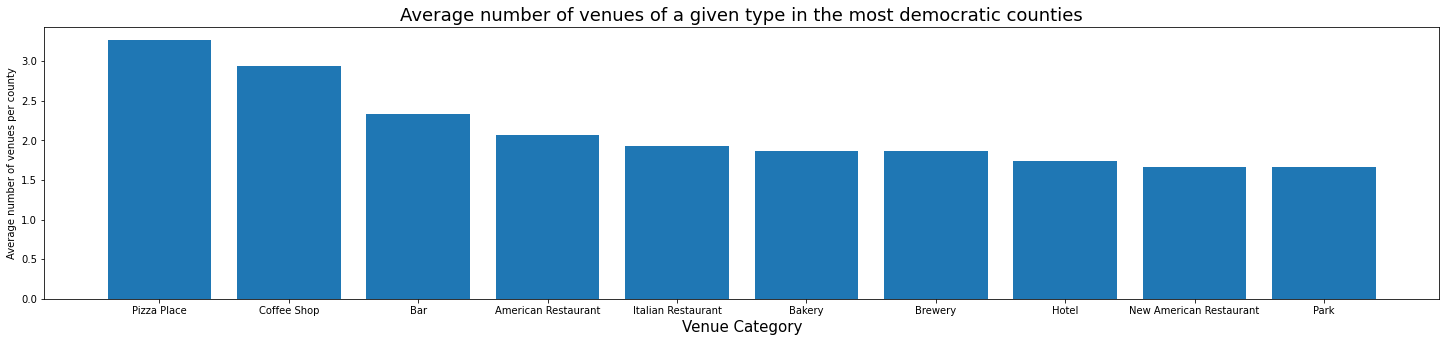

In [35]:
plt.figure(figsize=(25,5))
plt.bar(np.arange(len(dems_top_venues)), dems_top_venues['Venues per county'])
plt.xticks(np.arange(len(dems_top_venues)), dems_top_venues['Venue Category'].tolist())
plt.xlabel('Venue Category', fontdict = {'fontsize' : 15})
plt.ylabel('Average number of venues per county', fontdict = {'fontsize' : 10})
plt.title('Average number of venues of a given type in the most democratic counties', fontdict = {'fontsize' : 18})

Text(0.5, 1.0, 'Average number of venues of a given type in the most republican counties')

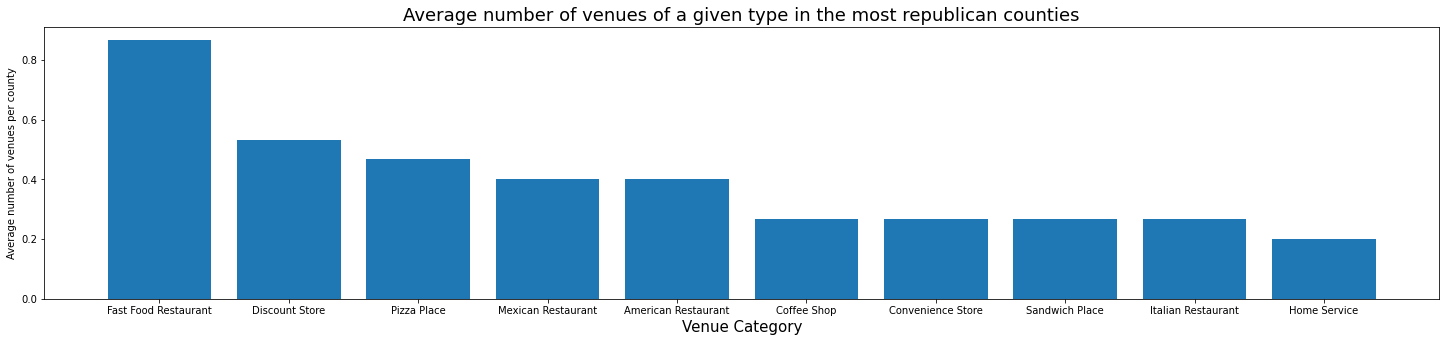

In [36]:
plt.figure(figsize=(25,5))
plt.bar(np.arange(len(dems_top_venues)), reps_top_venues['Venues per county'])
plt.xticks(np.arange(len(dems_top_venues)), reps_top_venues['Venue Category'].tolist())
plt.xlabel('Venue Category', fontdict = {'fontsize' : 15})
plt.ylabel('Average number of venues per county', fontdict = {'fontsize' : 10})
plt.title('Average number of venues of a given type in the most republican counties', fontdict = {'fontsize' : 18})

<h4 style="margin-top:5px;font-size:170%;font-family:Bahnschrift">Thank you for reviewing this notebook!</h4>